<a href="https://colab.research.google.com/github/JAYTRIVEDI2510/JAYTRIVEDI2510/blob/ASSIGNMENTS/Assignment_3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


# Q1

In [ ]:
Cutlet= pd.read_csv('/content/Cutlets.csv')
Cutlet

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


We are comparing the means of two independent groups and have assumptions about normality and equal variances, a common test is the Two-Sample T-Test.

In [ ]:
Cutlet.info()

# checking the null values and the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [ ]:
Cutlet.describe()

# mean, median, std of both variables

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


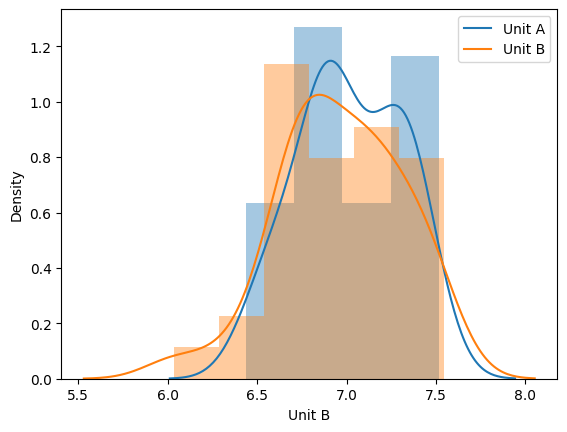

In [ ]:
# using distplot

sns.distplot(Cutlet['Unit A'], kde=True)
sns.distplot(Cutlet['Unit B'], hist=True)
plt.legend(Cutlet.columns)

# The data is continuous and follow a normal distribution

Conducting the Two-Sample T-Test to compare the means of the two groups.
If the p-value is less than 5%, we reject the null hypothesis.
If the p-value is greater than or equal to the 5%, we fail to reject the null hypothesis.

In [ ]:
statistic, p_value= stats.ttest_ind(Cutlet['Unit A'], Cutlet['Unit B'], alternative='two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


In [ ]:
alpha= 0.05
print('significance = %.3f  p_value = %.3f ' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null hypothesis, because there is a significance difference')
else:
    print('we fail to reject the Null hyputhesis')


significance = 0.050  p_value = 0.472 
we fail to reject the Null hyputhesis


# Q2

In [ ]:
LabTAT= pd.read_csv('/content/LabTAT.csv')
LabTAT

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


Since there are more than two groups (four laboratories), an analysis of variance (ANOVA) test would be appropriate to determine if there are any statistically significant differences in the means.

In [ ]:
LabTAT.info()

# chnching for null valuves and the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [ ]:
LabTAT.describe()

# mean, median, stdev of all the variables

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


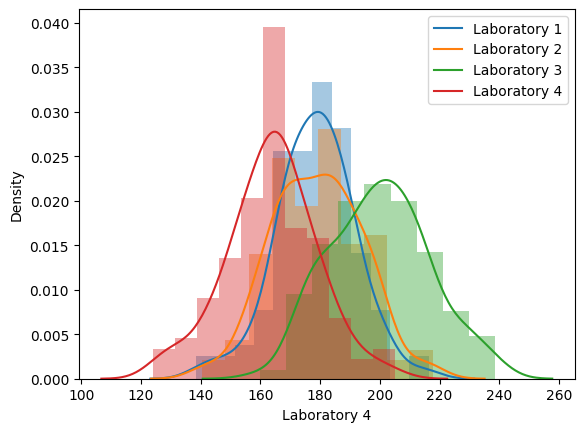

In [ ]:
sns.distplot(LabTAT['Laboratory 1'], kde=True)
sns.distplot(LabTAT['Laboratory 2'], hist=True)
sns.distplot(LabTAT['Laboratory 3'], hist=True)
sns.distplot(LabTAT['Laboratory 4'], hist=True)
plt.legend(LabTAT.columns)

# The data is continuous and follow a normal distribution

Conducting the ANOVA test to compare the means of TAT among the four laboratories.
If the p-value is less than the chosen significance level (5%), we reject the null hypothesis.
If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis.

In [ ]:
statistic, p_value= stats.f_oneway(LabTAT['Laboratory 1'],LabTAT['Laboratory 2'],LabTAT['Laboratory 3'],LabTAT['Laboratory 4'])
print('p_value=', p_value)

p_value= 2.1156708949992414e-57


In [ ]:
alpha= 0.05
print('significance=%.3f  p_value=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null hypothesis, because there is a significance difference')
else:
    print('We failed to reject Null hypothesis')

significance=0.050  p_value=0.000
We reject Null hypothesis, because there is a significance difference


# Q3

In [ ]:
BuyerRatio= pd.read_csv('/content/BuyerRatio.csv', index_col=0)
BuyerRatio

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


A chi-squared test for independence is an appropriate statistical test for this problem. This test assesses whether there is a significant association between two categorical variables.

In [ ]:
BuyerRatio.info()      # checking for the null values and the data types

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Males to Females
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   East    2 non-null      int64
 1   West    2 non-null      int64
 2   North   2 non-null      int64
 3   South   2 non-null      int64
dtypes: int64(4)
memory usage: 80.0+ bytes


In [ ]:
# using stats.chi2_contingency
stat, p, dof, exp = stats.chi2_contingency(BuyerRatio)
print('stats=',stat,'\n','p_value=',p,'\n','degree of freedom=',dof,'\n','expected=',exp)

stats= 1.595945538661058 
 p_value= 0.6603094907091882 
 degree of freedom= 3 
 expected= [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [ ]:
observed= np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected= np.array([42.76531299, 146.81287862, 131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

The result of the chi-squared test will provide a p-value. If the p-value is less than the chosen significance level (0.05), the null hypothesis may be rejected, suggesting that there is a significant association between gender and regions.

In [ ]:
statistic, p_value= stats.chisquare(observed, expected, ddof=3)
print('p_value=', p_value)

p_value= 0.8095206646905712


In [ ]:
alpha=0.05
print('significance = %.3f p_value = %.3f'  % (alpha, p_value))
if p_value <= alpha:
    print('We reject the Null hypothesis')
else:
    print('We failed to reject the Null hypothesis')

significance = 0.050 p_value = 0.810
We failed to reject the Null hypothesis


# Q4

In [ ]:
cous_orderform= pd.read_csv('/content/Costomer+OrderForm.csv', )
cous_orderform

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


A chi-squared test for independence or a test for proportions can be used to analyze whether the observed differences in defective percentages are statistically significant.

In [ ]:
# checking for null values and the data types

cous_orderform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [ ]:
# here we will considering the freq of the data because the the original data is in string format

cous_orderform.describe()


,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [ ]:
print(cous_orderform['Phillippines'].value_counts(), '\n', cous_orderform['Indonesia'].value_counts(), '\n', cous_orderform['Malta'].value_counts(), '\n', cous_orderform['India'].value_counts())

# we will be considering the total counts

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [ ]:
observed = [[271, 267, 269, 280],
          [29, 33, 31, 20]]
observed

[[271, 267, 269, 280], [29, 33, 31, 20]]

In [ ]:
stat, p, dof, exp = stats.chi2_contingency(observed)
print('stats=',stat,'\n','p_value=',p,'\n','degree of freedom=',dof,'\n','expected=',exp)

stats= 3.858960685820355 
 p_value= 0.2771020991233135 
 degree of freedom= 3 
 expected= [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [ ]:
observed= [271, 267, 269, 280, 29, 33, 31, 20]
expected= [271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25]

The result of the chi-squared test will provide a p-value. If the p-value is less than the chosen significance level (0.05), the null hypothesis may be rejected, suggesting that there is a significant association between gender and regions.

In [ ]:
statistic, p_value= stats.chisquare(observed, expected, ddof=3)
print('p_value=', p_value)

p_value= 0.4254298144535761


In [ ]:
alpha=0.05
print('significance=%.3f p_value=%.3f'  % (alpha, p_value))
if p_value <= alpha:
    print('We reject the Null hypothesis')
else:
    print('We failed to reject the Null hypothesis')

significance=0.050 p_value=0.425
We failed to reject the Null hypothesis
